In [241]:
# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

import utils_plotting_psd, utils_plotting, utils_psd, utils_io, utils_statistics
pd.options.display.float_format = "{:,.3f}".format

from lib_data import DATA_IO

In [242]:
PATH_CURR = os.path.abspath(os.curdir)    # current code
PATH      = (str(Path(PATH_CURR).parent)) # data repository: upper directory where datasets situated

In [245]:
# load PSD dataframe
LFP_PSD_controlateral = utils_io.load_LFP_event_PSD(event_category="tapping", event_laterality="controlateral")
LFP_PSD_ipsilateral   = utils_io.load_LFP_event_PSD(event_category="tapping", event_laterality="ipsilateral")

# 1. Plotting

## 1.1 Controlateral

<Figure size 640x480 with 0 Axes>

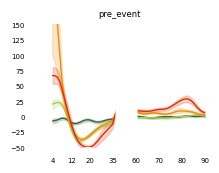

<Figure size 640x480 with 0 Axes>

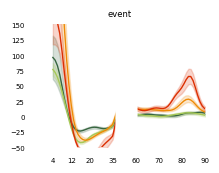

<Figure size 640x480 with 0 Axes>

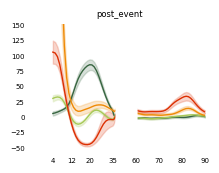

In [6]:
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_controlateral, segment="pre_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/controlateral/motor_LID_arm_severity_for_pre_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_controlateral, segment="event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/controlateral/motor_LID_arm_severity_for_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_controlateral, segment="post_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/controlateral/motor_LID_arm_severity_for_post_event_segment")

## 1.2 Ipsilateral

<Figure size 640x480 with 0 Axes>

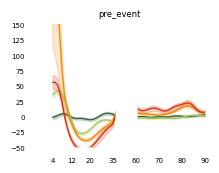

<Figure size 640x480 with 0 Axes>

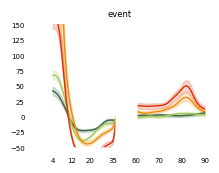

<Figure size 640x480 with 0 Axes>

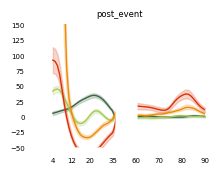

In [8]:
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_ipsilateral, segment="pre_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/ipsilateral/motor_LID_arm_severity_for_pre_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_ipsilateral, segment="event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/ipsilateral/motor_LID_arm_severity_for_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_ipsilateral, segment="post_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/ipsilateral/motor_LID_arm_severity_for_post_event_segment")

# 2. Statistical Analyses

## 2.2 Between Dyskinesia Severity Groups For Event Segments

In [247]:
LFP_PSD = pd.DataFrame()

for severity in LFP_PSD_controlateral.keys():
    LFP_PSD = pd.concat([LFP_PSD, LFP_PSD_controlateral[severity]], ignore_index=True)

LFP_PSD['grouping_1'] = LFP_PSD['dyskinesia_arm'].map({'none':'A_noLID', 'mild':'B_LID', 'moderate':'B_LID'})
LFP_PSD['grouping_2'] = LFP_PSD['dyskinesia_arm']
LFP_PSD.loc[(LFP_PSD['event_start_time'] < 30)  & (LFP_PSD['grouping_2'] == "none"), 'grouping_2'] = 'noLID_noDOPA'
LFP_PSD.loc[(LFP_PSD['event_start_time'] >= 30) & (LFP_PSD['grouping_2'] == "none"), 'grouping_2'] = 'noLID_DOPA'
LFP_PSD['grouping_2'] = LFP_PSD['grouping_2'].map({'noLID_noDOPA':'A_noLID', 'noLID_DOPA':'A_noLID', 'mild':'B_mild', 'moderate':'C_moderate'})
LFP_PSD['grouping_3'] = LFP_PSD['grouping_2'].map({'A_noLID':'C_noLID', 'B_mild':'A_mild', 'C_moderate':'B_moderate'})

In [251]:
LFP_PSD.columns

Index(['index', 'patient', 'event_no', 'event_category', 'event_laterality',
       'event_start_time', 'duration', 'LFP_hemisphere', 'LFP_channel',
       'pre_event_psd', 'event_psd', 'post_event_psd', 'dyskinesia_arm',
       'dyskinesia_total', 'pre_event_theta_deviation', 'pre_event_theta_mean',
       'pre_event_alpha_deviation', 'pre_event_alpha_mean',
       'pre_event_beta_deviation', 'pre_event_beta_mean',
       'pre_event_beta_low_deviation', 'pre_event_beta_low_mean',
       'pre_event_beta_high_deviation', 'pre_event_beta_high_mean',
       'pre_event_gamma_deviation', 'pre_event_gamma_mean',
       'pre_event_gamma_I_deviation', 'pre_event_gamma_I_mean',
       'pre_event_gamma_II_deviation', 'pre_event_gamma_II_mean',
       'pre_event_gamma_III_deviation', 'pre_event_gamma_III_mean',
       'event_theta_deviation', 'event_theta_mean', 'event_alpha_deviation',
       'event_alpha_mean', 'event_beta_deviation', 'event_beta_mean',
       'event_beta_low_deviation', 'event

In [257]:
LFP_PSD.patient.value_counts()

patient
014    708
109    685
021    665
013    572
110    517
012    498
008    440
009    287
103    204
022    199
020    180
023    136
105     91
102     69
108     50
Name: count, dtype: int64

In [249]:
features_pre_event    = ['pre_event_theta_mean', 'pre_event_alpha_mean', 'pre_event_beta_low_mean', 'pre_event_beta_high_mean', 'pre_event_gamma_mean']
features_event        = ['event_theta_mean', 'event_alpha_mean', 'event_beta_low_mean', 'event_beta_high_mean', 'event_gamma_mean']
features_post_event   = ['post_event_theta_mean', 'post_event_alpha_mean', 'post_event_beta_low_mean', 'post_event_beta_high_mean', 'post_event_gamma_mean']

### 2.2.1 Pre-Event Segment

In [51]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independed_variable="grouping_2", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independed_variable="grouping_3", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results_2 = LMM_results_2[(LMM_results_2.group_1=="A_mild") & (LMM_results_2.group_2=="B_moderate")]

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value, correction_method='fdr_bh')
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_2
--> groups               : A_noLID, B_mild, C_moderate
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : pre_event_theta_mean
--> response variable    : pre_event_alpha_mean
--> response variable    : pre_event_beta_low_mean
--> response variable    : pre_event_beta_high_mean
--> response variable    : pre_event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3
--> groups               : A_mild, B_moderate, C_noLI

,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,pre_event_theta_mean,A_noLID,B_mild,181.859,<statsmodels.regression.mixed_linear_model.Mix...,False,0.006,0.047
1,pre_event_theta_mean,A_noLID,C_moderate,99.698,<statsmodels.regression.mixed_linear_model.Mix...,False,0.385,0.525
2,pre_event_alpha_mean,A_noLID,B_mild,40.695,<statsmodels.regression.mixed_linear_model.Mix...,True,0.043,0.130
3,pre_event_alpha_mean,A_noLID,C_moderate,36.285,<statsmodels.regression.mixed_linear_model.Mix...,True,0.172,0.359
4,pre_event_beta_low_mean,A_noLID,B_mild,3.562,<statsmodels.regression.mixed_linear_model.Mix...,True,0.762,0.832
5,pre_event_beta_low_mean,A_noLID,C_moderate,-9.528,<statsmodels.regression.mixed_linear_model.Mix...,True,0.384,0.525
6,pre_event_beta_high_mean,A_noLID,B_mild,22.131,<statsmodels.regression.mixed_linear_model.Mix...,True,0.231,0.384
7,pre_event_beta_high_mean,A_noLID,C_moderate,0.836,<statsmodels.regression.mixed_linear_model.Mix...,True,0.936,0.936
8,pre_event_gamma_mean,A_noLID,B_mild,2.539,<statsmodels.regression.mixed_linear_model.Mix...,True,0.191,0.359
9,pre_event_gamma_mean,A_noLID,C_moderate,9.877,<statsmodels.regression.mixed_linear_model.Mix...,True,0.003,0.045


In [61]:
LMM_results_1.iloc[7].model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Mixed Linear Model Regression Results
=================================================================================================
Model:                     MixedLM          Dependent Variable:          pre_event_beta_high_mean
No. Observations:          5301             Method:                      REML                    
No. Groups:                15               Scale:                       1360.4133               
Min. group size:           50               Log-Likelihood:              -26687.3427             
Max. group size:           708              Converged:                   Yes                     
Mean group size:           353.4                                                                 
-------------------------------------------------------------------------------------------------
                                                     Coef.   Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                             -5.747    2.319 -2.478 0.013 -10.292 -1.202
grouping_2[T.B_mild]                                  22.131   18.459  1.199 0.231 -14.048 58.310
grouping_2[T.C_moderate]                               0.836   10.329  0.081 0.936 -19.408 21.079
Group Var                                             54.526    0.707                            
Group x grouping_2[T.B_mild] Cov                      -2.545    4.325                            
grouping_2[T.B_mild] Var                            4312.139   43.361                            
Group x grouping_2[T.C_moderate] Cov                  48.305    2.509                            
grouping_2[T.B_mild] x grouping_2[T.C_moderate] Cov 2172.260   22.498                            
grouping_2[T.C_moderate] Var                        1149.460   12.166                            
=================================================================================================

"""

In [24]:
LMM_results = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independed_variable="grouping_1", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_1
--> groups               : A_noLID, B_LID
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : pre_event_theta_mean
--> response variable    : pre_event_alpha_mean
--> response variable    : pre_event_beta_low_mean
--> response variable    : pre_event_beta_high_mean
--> response variable    : pre_event_gamma_mean


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,pre_event_theta_mean,A_noLID,B_LID,147.597,<statsmodels.regression.mixed_linear_model.Mix...,False,0.076,0.127
1,pre_event_alpha_mean,A_noLID,B_LID,41.222,<statsmodels.regression.mixed_linear_model.Mix...,True,0.062,0.127
2,pre_event_beta_low_mean,A_noLID,B_LID,2.230,<statsmodels.regression.mixed_linear_model.Mix...,True,0.842,0.842
3,pre_event_beta_high_mean,A_noLID,B_LID,13.688,<statsmodels.regression.mixed_linear_model.Mix...,True,0.279,0.349
4,pre_event_gamma_mean,A_noLID,B_LID,4.157,<statsmodels.regression.mixed_linear_model.Mix...,True,0.028,0.127


### 2.2.2 Event Segment

In [125]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_event, independed_variable="grouping_2", random_effect="patient", 
                                             random_intercept=True, random_slope=False, correction_method='fdr_bh')
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_event, independed_variable="grouping_3", random_effect="patient", 
                                             random_intercept=True, random_slope=False, correction_method='fdr_bh')

LMM_results_2 = LMM_results_2[(LMM_results_2.group_1=="A_mild") & (LMM_results_2.group_2=="B_moderate")]

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value, correction_method='fdr_bh')
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_2
--> groups               : A_noLID, B_mild, C_moderate
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : event_theta_mean
--> response variable    : event_alpha_mean
--> response variable    : event_beta_low_mean
--> response variable    : event_beta_high_mean
--> response variable    : event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3
--> groups               : A_mild, B_moderate, C_noLID
--> random effect 

,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,event_theta_mean,A_noLID,B_mild,208.487,<statsmodels.regression.mixed_linear_model.Mix...,True,0.000,0.000
1,event_theta_mean,A_noLID,C_moderate,42.297,<statsmodels.regression.mixed_linear_model.Mix...,True,0.496,0.508
2,event_alpha_mean,A_noLID,B_mild,82.072,<statsmodels.regression.mixed_linear_model.Mix...,True,0.000,0.000
3,event_alpha_mean,A_noLID,C_moderate,15.880,<statsmodels.regression.mixed_linear_model.Mix...,True,0.508,0.508
4,event_beta_low_mean,A_noLID,B_mild,-3.424,<statsmodels.regression.mixed_linear_model.Mix...,True,0.301,0.377
5,event_beta_low_mean,A_noLID,C_moderate,-12.305,<statsmodels.regression.mixed_linear_model.Mix...,True,0.006,0.009
6,event_beta_high_mean,A_noLID,B_mild,9.866,<statsmodels.regression.mixed_linear_model.Mix...,True,0.000,0.000
7,event_beta_high_mean,A_noLID,C_moderate,11.730,<statsmodels.regression.mixed_linear_model.Mix...,True,0.000,0.000
8,event_gamma_mean,A_noLID,B_mild,3.469,<statsmodels.regression.mixed_linear_model.Mix...,True,0.010,0.016
9,event_gamma_mean,A_noLID,C_moderate,9.229,<statsmodels.regression.mixed_linear_model.Mix...,True,0.000,0.000


In [232]:
LMM_results = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_event, independed_variable="grouping_1", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_1
--> groups               : A_noLID, B_LID
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : event_theta_mean
--> response variable    : event_alpha_mean
--> response variable    : event_beta_low_mean
--> response variable    : event_beta_high_mean
--> response variable    : event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,event_theta_mean,A_noLID,B_LID,132.842,<statsmodels.regression.mixed_linear_model.Mix...,True,0.263,0.412
1,event_alpha_mean,A_noLID,B_LID,75.228,<statsmodels.regression.mixed_linear_model.Mix...,True,0.143,0.359
2,event_beta_low_mean,A_noLID,B_LID,0.222,<statsmodels.regression.mixed_linear_model.Mix...,True,0.987,0.987
3,event_beta_high_mean,A_noLID,B_LID,8.558,<statsmodels.regression.mixed_linear_model.Mix...,True,0.330,0.412
4,event_gamma_mean,A_noLID,B_LID,6.405,<statsmodels.regression.mixed_linear_model.Mix...,True,0.028,0.138


### 2.2.3 Post-Event Segment

In [45]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_post_event, independed_variable="grouping_2", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_post_event, independed_variable="grouping_3", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results_2 = LMM_results_2[(LMM_results_2.group_1=="A_mild") & (LMM_results_2.group_2=="B_moderate")]

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value, correction_method='fdr_bh')
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_2
--> groups               : A_noLID, B_mild, C_moderate
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : post_event_theta_mean
--> response variable    : post_event_alpha_mean
    -> issue: A_noLID vs C_moderate
        -> warning: some eigenvalues close to zero, indicating a potential singularity issue in covariance matrix.
        -> warning: infinite VIF values, indicating a high degree of multicollinearity leading failed estimation of model parameters
        -> switching from REML to ML Estimation
        -> issue resolved: the result for given two groups was added to the output!
--> response variable    : post_event_beta_low_mean
--> response variable    : post_event_beta_high_mean
--> response variable

,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,post_event_theta_mean,A_noLID,B_mild,368.452,<statsmodels.regression.mixed_linear_model.Mix...,True,0.505,0.689
1,post_event_theta_mean,A_noLID,C_moderate,163.698,<statsmodels.regression.mixed_linear_model.Mix...,True,0.355,0.637
2,post_event_alpha_mean,A_noLID,B_mild,76.837,<statsmodels.regression.mixed_linear_model.Mix...,True,0.007,0.054
3,post_event_alpha_mean,A_noLID,C_moderate,78.103,<statsmodels.regression.mixed_linear_model.Mix...,True,0.060,0.180
4,post_event_beta_low_mean,A_noLID,B_mild,-7.730,<statsmodels.regression.mixed_linear_model.Mix...,True,0.564,0.705
5,post_event_beta_low_mean,A_noLID,C_moderate,-42.336,<statsmodels.regression.mixed_linear_model.Mix...,True,0.016,0.079
6,post_event_beta_high_mean,A_noLID,B_mild,13.424,<statsmodels.regression.mixed_linear_model.Mix...,True,0.382,0.637
7,post_event_beta_high_mean,A_noLID,C_moderate,1.907,<statsmodels.regression.mixed_linear_model.Mix...,True,0.936,0.938
8,post_event_gamma_mean,A_noLID,B_mild,3.415,<statsmodels.regression.mixed_linear_model.Mix...,True,0.000,0.000
9,post_event_gamma_mean,A_noLID,C_moderate,9.055,<statsmodels.regression.mixed_linear_model.Mix...,True,0.022,0.081


In [46]:
LMM_results = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_post_event, independed_variable="grouping_1", random_effect="patient", 
                                             random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_1
--> groups               : A_noLID, B_LID
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : post_event_theta_mean
--> response variable    : post_event_alpha_mean
--> response variable    : post_event_beta_low_mean
--> response variable    : post_event_beta_high_mean
--> response variable    : post_event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,post_event_theta_mean,A_noLID,B_LID,377.217,<statsmodels.regression.mixed_linear_model.Mix...,True,0.526,0.526
1,post_event_alpha_mean,A_noLID,B_LID,74.054,<statsmodels.regression.mixed_linear_model.Mix...,True,0.199,0.499
2,post_event_beta_low_mean,A_noLID,B_LID,-7.797,<statsmodels.regression.mixed_linear_model.Mix...,True,0.501,0.526
3,post_event_beta_high_mean,A_noLID,B_LID,13.412,<statsmodels.regression.mixed_linear_model.Mix...,True,0.461,0.526
4,post_event_gamma_mean,A_noLID,B_LID,3.857,<statsmodels.regression.mixed_linear_model.Mix...,True,0.004,0.018


## 2.3 Within Dyskinesia Severity Groups

In [11]:
# make a compact version

theta = LFP_PSD.pre_event_theta_mean.to_list()
theta.extend(LFP_PSD.event_theta_mean.to_list())
theta.extend(LFP_PSD.post_event_theta_mean.to_list())

alpha = LFP_PSD.pre_event_alpha_mean.to_list()
alpha.extend(LFP_PSD.event_alpha_mean.to_list())
alpha.extend(LFP_PSD.post_event_alpha_mean.to_list())

beta_low = LFP_PSD.pre_event_beta_low_mean.to_list()
beta_low.extend(LFP_PSD.event_beta_low_mean.to_list())
beta_low.extend(LFP_PSD.post_event_beta_low_mean.to_list())

beta_high = LFP_PSD.pre_event_beta_high_mean.to_list()
beta_high.extend(LFP_PSD.event_beta_high_mean.to_list())
beta_high.extend(LFP_PSD.post_event_beta_high_mean.to_list())

gamma  = LFP_PSD.pre_event_gamma_mean.to_list()
gamma.extend(LFP_PSD.event_gamma_mean.to_list())
gamma.extend(LFP_PSD.event_gamma_mean.to_list())

segment = ["pre_event"] * len(LFP_PSD)
segment.extend(["event"] * len(LFP_PSD))
segment.extend(["post_event"] * len(LFP_PSD))

LFP_PSD_compact                   = pd.DataFrame()
LFP_PSD_compact['patient']        = LFP_PSD['patient'].to_list() * 3
LFP_PSD_compact['event_no']       = LFP_PSD['event_no'].to_list() * 3
LFP_PSD_compact['grouping_1']     = LFP_PSD['grouping_1'].to_list() * 3
LFP_PSD_compact['grouping_2']     = LFP_PSD['grouping_2'].to_list() * 3
LFP_PSD_compact['grouping_3']     = LFP_PSD['grouping_3'].to_list() * 3
LFP_PSD_compact['segment']        = segment
LFP_PSD_compact['theta_mean']     = theta
LFP_PSD_compact['alpha_mean']     = alpha

LFP_PSD_compact['beta_low_mean']  = beta_low
LFP_PSD_compact['beta_high_mean'] = beta_high
LFP_PSD_compact['gamma_mean']     = gamma

LFP_PSD_compact['segment_1']      = LFP_PSD_compact['segment'].map({'pre_event':'A_pre_event', 'event':'B_event', 'post_event':'C_post_event'})
LFP_PSD_compact['segment_2']      = LFP_PSD_compact['segment'].map({'pre_event':'C_pre_event', 'event':'A_event', 'post_event':'B_post_event'})

### 2.3.1 No-LID

In [74]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_2=="A_noLID"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[(LFP_PSD_compact.grouping_2=="A_noLID") & (LFP_PSD_compact.segment_1!="A_pre_event")], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value, correction_method='fdr_bh')

LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : segment_1
--> groups               : A_pre_event, B_event, C_post_event
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : theta_mean
--> response variable    : alpha_mean
--> response variable    : beta_low_mean
--> response variable    : beta_high_mean
--> response variable    : gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,theta_mean,A_pre_event,B_event,256.868,<statsmodels.regression.mixed_linear_model.Mix...,True,0.483,0.557
1,theta_mean,A_pre_event,C_post_event,16.166,<statsmodels.regression.mixed_linear_model.Mix...,True,0.153,0.255
2,alpha_mean,A_pre_event,B_event,78.524,<statsmodels.regression.mixed_linear_model.Mix...,True,0.185,0.277
3,alpha_mean,A_pre_event,C_post_event,14.862,<statsmodels.regression.mixed_linear_model.Mix...,True,0.009,0.033
4,beta_low_mean,A_pre_event,B_event,0.361,<statsmodels.regression.mixed_linear_model.Mix...,True,0.960,0.981
5,beta_low_mean,A_pre_event,C_post_event,38.716,<statsmodels.regression.mixed_linear_model.Mix...,True,0.001,0.014
6,beta_high_mean,A_pre_event,B_event,-4.039,<statsmodels.regression.mixed_linear_model.Mix...,True,0.233,0.318
7,beta_high_mean,A_pre_event,C_post_event,23.188,<statsmodels.regression.mixed_linear_model.Mix...,True,0.002,0.014
8,gamma_mean,A_pre_event,B_event,3.621,<statsmodels.regression.mixed_linear_model.Mix...,False,0.097,0.209
9,gamma_mean,A_pre_event,C_post_event,3.598,<statsmodels.regression.mixed_linear_model.Mix...,False,0.140,0.255


### 2.3.2 Mild

In [76]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_2=="B_mild"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[(LFP_PSD_compact.grouping_2=="B_mild") & (LFP_PSD_compact.segment_1!="A_pre_event")], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value, correction_method='fdr_bh')
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : segment_1
--> groups               : A_pre_event, B_event, C_post_event
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : theta_mean
--> response variable    : alpha_mean
--> response variable    : beta_low_mean
--> response variable    : beta_high_mean
--> response variable    : gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,theta_mean,A_pre_event,B_event,338.539,<statsmodels.regression.mixed_linear_model.Mix...,True,0.188,0.378
1,theta_mean,A_pre_event,C_post_event,265.186,<statsmodels.regression.mixed_linear_model.Mix...,True,0.340,0.464
2,alpha_mean,A_pre_event,B_event,182.910,<statsmodels.regression.mixed_linear_model.Mix...,True,0.202,0.378
3,alpha_mean,A_pre_event,C_post_event,78.220,<statsmodels.regression.mixed_linear_model.Mix...,True,0.154,0.378
4,beta_low_mean,A_pre_event,B_event,21.754,<statsmodels.regression.mixed_linear_model.Mix...,True,0.254,0.381
5,beta_low_mean,A_pre_event,C_post_event,50.110,<statsmodels.regression.mixed_linear_model.Mix...,True,0.008,0.039
6,beta_high_mean,A_pre_event,B_event,-21.272,<statsmodels.regression.mixed_linear_model.Mix...,True,0.188,0.378
7,beta_high_mean,A_pre_event,C_post_event,14.660,<statsmodels.regression.mixed_linear_model.Mix...,True,0.227,0.378
8,gamma_mean,A_pre_event,B_event,7.562,<statsmodels.regression.mixed_linear_model.Mix...,False,0.003,0.026
9,gamma_mean,A_pre_event,C_post_event,7.530,<statsmodels.regression.mixed_linear_model.Mix...,False,0.004,0.026


### 2.3.3 Moderate

In [78]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_2=="C_moderate"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[(LFP_PSD_compact.grouping_2=="C_moderate") & (LFP_PSD_compact.segment_1!="A_pre_event")], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value, correction_method='fdr_bh')
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : segment_1
--> groups               : A_pre_event, B_event, C_post_event
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : theta_mean
--> response variable    : alpha_mean
--> response variable    : beta_low_mean
--> response variable    : beta_high_mean
--> response variable    : gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,theta_mean,A_pre_event,B_event,183.678,<statsmodels.regression.mixed_linear_model.Mix...,True,0.156,0.252
1,theta_mean,A_pre_event,C_post_event,40.334,<statsmodels.regression.mixed_linear_model.Mix...,True,0.139,0.252
2,alpha_mean,A_pre_event,B_event,65.968,<statsmodels.regression.mixed_linear_model.Mix...,True,0.097,0.249
3,alpha_mean,A_pre_event,C_post_event,18.613,<statsmodels.regression.mixed_linear_model.Mix...,True,0.245,0.299
4,beta_low_mean,A_pre_event,B_event,-0.568,<statsmodels.regression.mixed_linear_model.Mix...,True,0.927,0.927
5,beta_low_mean,A_pre_event,C_post_event,6.453,<statsmodels.regression.mixed_linear_model.Mix...,True,0.174,0.252
6,beta_high_mean,A_pre_event,B_event,-11.745,<statsmodels.regression.mixed_linear_model.Mix...,True,0.099,0.249
7,beta_high_mean,A_pre_event,C_post_event,20.650,<statsmodels.regression.mixed_linear_model.Mix...,True,0.185,0.252
8,gamma_mean,A_pre_event,B_event,8.891,<statsmodels.regression.mixed_linear_model.Mix...,True,0.023,0.172
9,gamma_mean,A_pre_event,C_post_event,9.008,<statsmodels.regression.mixed_linear_model.Mix...,True,0.017,0.172


### 2.3.4 LID

In [81]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_1=="B_LID"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[(LFP_PSD_compact.grouping_1=="B_LID") & (LFP_PSD_compact.segment_1!="A_pre_event")], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independed_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True, correction_method='fdr_bh')

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : segment_1
--> groups               : A_pre_event, B_event, C_post_event
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : theta_mean
--> response variable    : alpha_mean
--> response variable    : beta_low_mean
--> response variable    : beta_high_mean
--> response variable    : gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------


,feature,group_1,group_2,coefficient,model,converged,p_value,p_value_corrected
0,theta_mean,A_pre_event,B_event,259.080,<statsmodels.regression.mixed_linear_model.Mix...,True,0.158,0.206
1,theta_mean,A_pre_event,C_post_event,259.569,<statsmodels.regression.mixed_linear_model.Mix...,True,0.305,0.339
2,alpha_mean,A_pre_event,B_event,131.055,<statsmodels.regression.mixed_linear_model.Mix...,True,0.144,0.206
3,alpha_mean,A_pre_event,C_post_event,71.355,<statsmodels.regression.mixed_linear_model.Mix...,True,0.151,0.206
4,beta_low_mean,A_pre_event,B_event,10.194,<statsmodels.regression.mixed_linear_model.Mix...,True,0.440,0.440
5,beta_low_mean,A_pre_event,C_post_event,37.313,<statsmodels.regression.mixed_linear_model.Mix...,True,0.019,0.047
6,beta_high_mean,A_pre_event,B_event,-9.740,<statsmodels.regression.mixed_linear_model.Mix...,True,0.165,0.206
7,beta_high_mean,A_pre_event,C_post_event,23.883,<statsmodels.regression.mixed_linear_model.Mix...,True,0.005,0.017
8,gamma_mean,A_pre_event,B_event,7.572,<statsmodels.regression.mixed_linear_model.Mix...,True,0.001,0.005
9,gamma_mean,A_pre_event,C_post_event,7.595,<statsmodels.regression.mixed_linear_model.Mix...,True,0.001,0.005


## 2.4 Consider Dyskinesia Severity + Event Segment Interaction (Similar to Two-Way Anova)

In [35]:
results_1 = utils_statistics.run_LMM_model_with_interaction(dataset=LFP_PSD_compact, 
                                                            response_variables=['theta_mean', 'alpha_mean', 'beta_low_mean', 'beta_high_mean','gamma_mean'], 
                                                            independed_variable="grouping_2", block_variable="segment_1", random_effect="patient", 
                                                            random_intercept=True, random_slope=True)
results_2 = utils_statistics.run_LMM_model_with_interaction(dataset=LFP_PSD_compact, 
                                                            response_variables=['theta_mean', 'alpha_mean', 'beta_low_mean', 'beta_high_mean','gamma_mean'], 
                                                            independed_variable="grouping_3", block_variable="segment_1", random_effect="patient", 
                                                            random_intercept=True, random_slope=True)

results_2 = results_2[(results_2.reference_severity=="A_mild") & (results_2.comparison_severity=="B_moderate")]
results                      = pd.concat([results_1, results_2], ignore_index=True)
results["p_value_corrected"] = utils_statistics.apply_multiple_correction(results.p_value, correction_method='fdr_bh')

Linear Mixed Effect Model with Interaction Started
------------------------------------------------------------------
--> independent variable : grouping_2 [A_noLID, B_mild, C_moderate] 
--> block variable       : segment_1 [A_pre_event, B_event, C_post_event] 
--> interaction          : grouping_2 * segment_1
--> random effect        : patient
--> random intercept     : True
--> random slope         : True
------------------------------------------------------------------
--> response variable    : theta_mean
--> response variable    : alpha_mean
--> response variable    : beta_low_mean
--> response variable    : beta_high_mean
--> response variable    : gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
Linear Mixed Effect Model with Interaction Started
------------------------------------------------------------------
--> in

In [41]:
results[['feature', 'reference_severity', 'reference_segment',
       'comparison_severity', 'comparison_segment', 'coefficient','p_value_corrected']]

,feature,reference_severity,reference_segment,comparison_severity,comparison_segment,coefficient,p_value_corrected
0,theta_mean,A_noLID,A_pre_event,B_mild,B_event,136.403,0.010
1,theta_mean,A_noLID,A_pre_event,C_moderate,B_event,21.213,0.788
2,theta_mean,A_noLID,A_pre_event,B_mild,C_post_event,346.353,0.000
3,theta_mean,A_noLID,A_pre_event,C_moderate,C_post_event,20.495,0.788
4,alpha_mean,A_noLID,A_pre_event,B_mild,B_event,74.548,0.000
5,alpha_mean,A_noLID,A_pre_event,C_moderate,B_event,12.513,0.530
6,alpha_mean,A_noLID,A_pre_event,B_mild,C_post_event,58.103,0.000
7,alpha_mean,A_noLID,A_pre_event,C_moderate,C_post_event,-9.888,0.627
8,beta_low_mean,A_noLID,A_pre_event,B_mild,B_event,13.656,0.001
9,beta_low_mean,A_noLID,A_pre_event,C_moderate,B_event,-1.468,0.788


# 3. Neural Feature Plotting

<Axes: xlabel='segment', ylabel='theta_mean'>

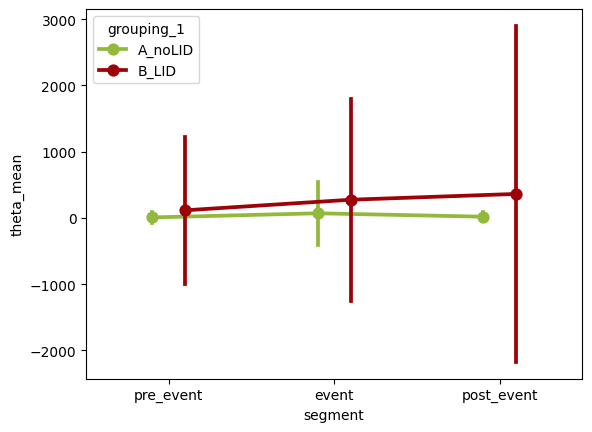

In [85]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="theta_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

<Axes: xlabel='segment', ylabel='alpha_mean'>

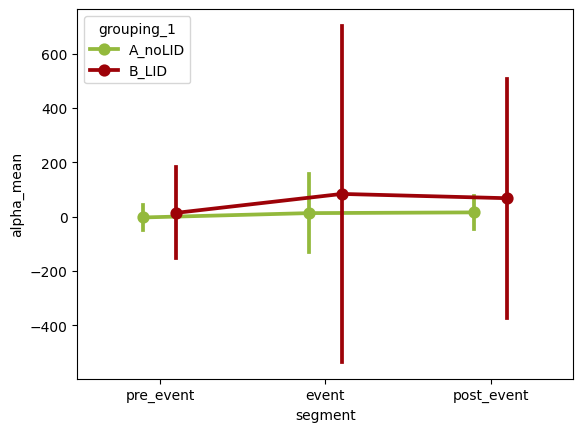

In [87]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="alpha_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

<Axes: xlabel='segment', ylabel='beta_low_mean'>

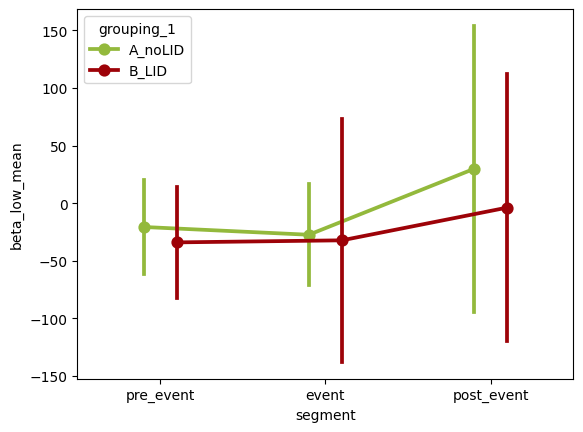

In [91]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_low_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

<Axes: xlabel='segment', ylabel='beta_high_mean'>

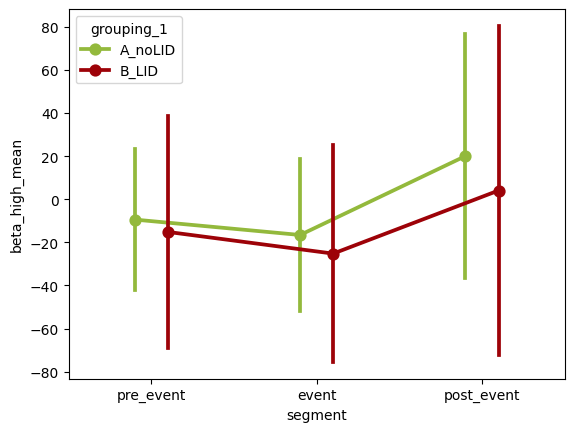

In [93]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_high_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

<Axes: xlabel='segment', ylabel='gamma_mean'>

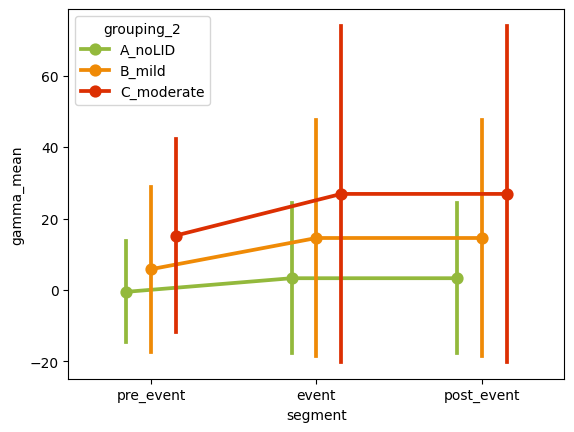

In [153]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="gamma_mean", hue="grouping_2", errorbar=('sd', 1),dodge=0.3,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

<Axes: xlabel='segment', ylabel='beta_high_mean'>

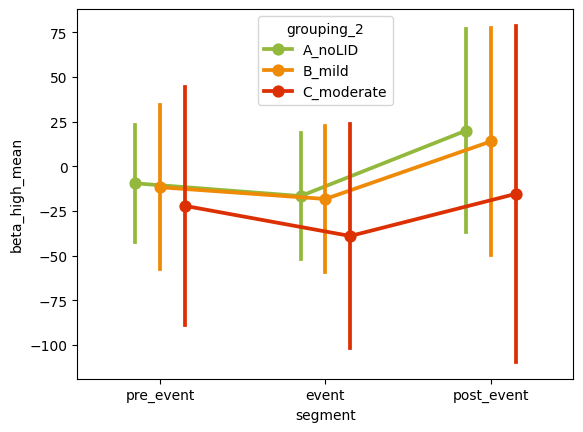

In [79]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_high_mean", hue="grouping_2", errorbar=('sd', 1), dodge=0.3,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

<Axes: xlabel='segment', ylabel='beta_low_mean'>

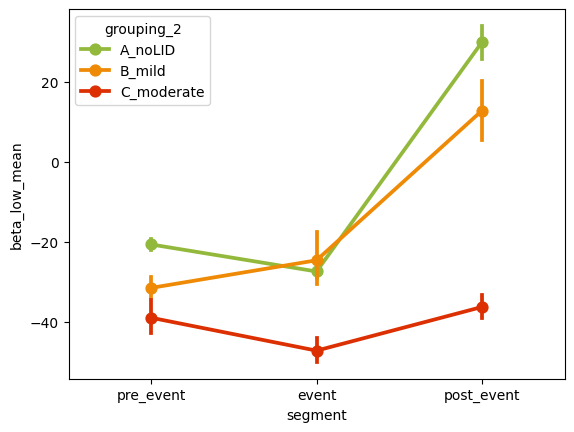

In [28]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_low_mean", hue="grouping_2", 
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

<Axes: xlabel='segment', ylabel='alpha_mean'>

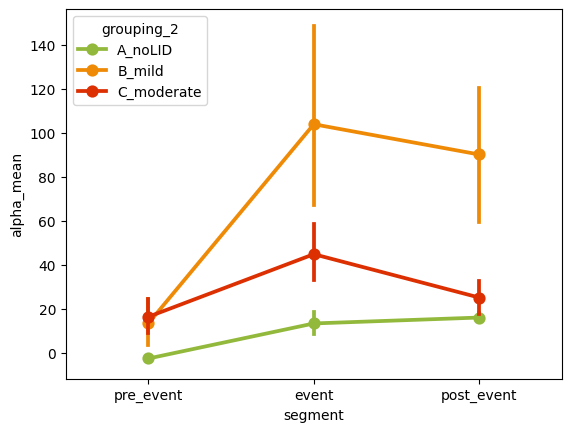

In [30]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="alpha_mean", hue="grouping_2", 
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

<Axes: xlabel='segment', ylabel='theta_mean'>

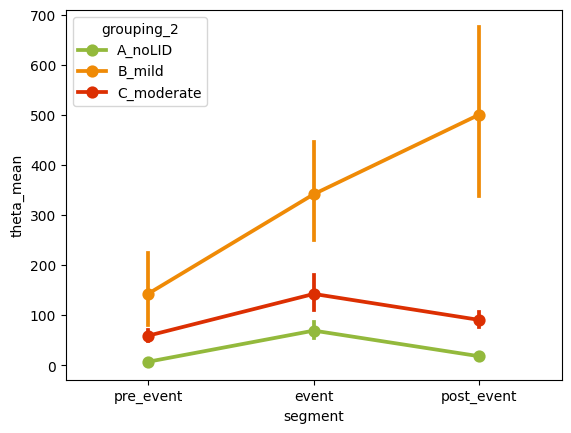

In [34]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="theta_mean", hue="grouping_2", 
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

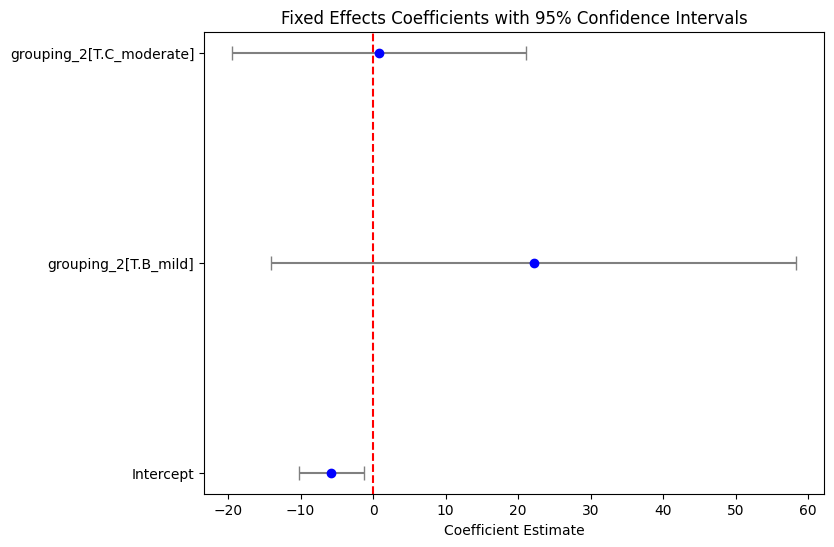

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define the fixed effects coefficients and confidence intervals
coef_names = ["Intercept", "grouping_2[T.B_mild]", "grouping_2[T.C_moderate]"]
coef_values = [-5.747, 22.131, 0.836]
conf_intervals = [[-10.292, -1.202], [-14.048, 58.310], [-19.408, 21.079]]

# Prepare data for plotting
errors = [(coef_values[i] - conf_intervals[i][0], conf_intervals[i][1] - coef_values[i]) for i in range(len(coef_values))]

# Plot fixed effects with confidence intervals
plt.figure(figsize=(8, 6))
plt.errorbar(coef_values, coef_names, xerr=np.array(errors).T, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel("Coefficient Estimate")
plt.title("Fixed Effects Coefficients with 95% Confidence Intervals")
plt.show()

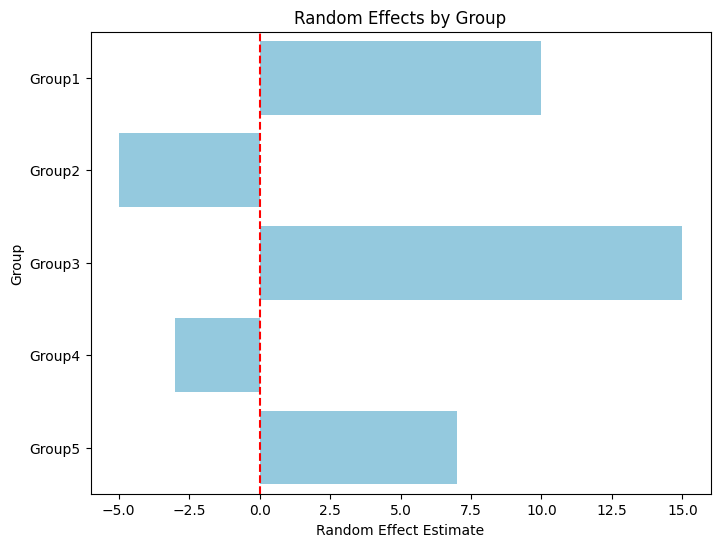

In [65]:
import pandas as pd
import seaborn as sns

# Example random effects data for plotting
random_effects_data = {
    'Group': ['Group1', 'Group2', 'Group3', 'Group4', 'Group5'],
    'Random_Effect': [10, -5, 15, -3, 7]
}

# Convert to DataFrame
random_effects_df = pd.DataFrame(random_effects_data)

# Plot random effects
plt.figure(figsize=(8, 6))
sns.barplot(x="Random_Effect", y="Group", data=random_effects_df, color='skyblue')
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel("Random Effect Estimate")
plt.title("Random Effects by Group")
plt.show()

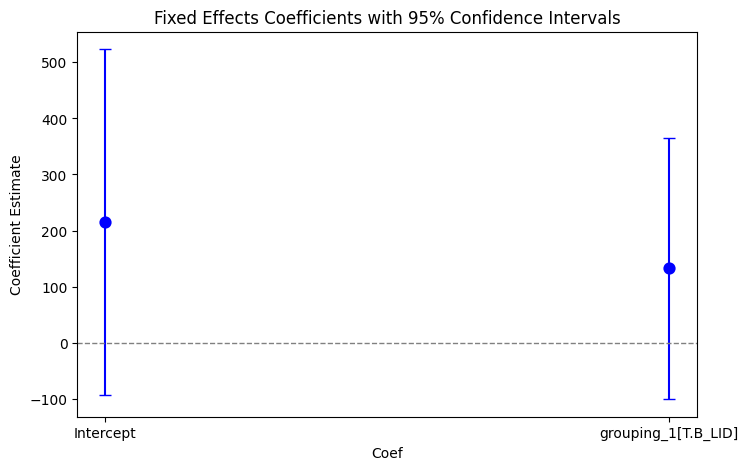

In [234]:
# Coefficient results data
coef_data = pd.DataFrame({
    'Coef': ['Intercept', 'grouping_1[T.B_LID]'],
    'Estimate': [215.733, 132.842],
    'Std. Error': [156.891, 118.719],
    'CI Lower': [-91.768, -99.844],
    'CI Upper': [523.234, 365.528]
})

# Plotting
plt.figure(figsize=(8, 5))
sns.pointplot(data=coef_data, x='Coef', y='Estimate',join=False,capsize=0.2,color='blue')
plt.errorbar(coef_data['Coef'], coef_data['Estimate'], yerr=[coef_data['Estimate'] - coef_data['CI Lower'], coef_data['CI Upper'] - coef_data['Estimate']], fmt='o', color='blue', capsize=4)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel("Coefficient Estimate")
plt.title("Fixed Effects Coefficients with 95% Confidence Intervals")
plt.show()